In [1]:
# Data Market Company
# First thing "Data Preparation"
# Problem
# 1. decreasing brand loyalty
# 2. slowly increasing operational costs
# 3. facing challenges from competitors
# 4. explore any opportunities that can drive Data Market to be more competitive than it currently is

# what we have is 
# 1. containing information about supermarket's transactions
# 2. Supermarket Dataset

# Based on the given dataset,
# 1) From the situation given by your customers, suggest interesting business questions and explain
#    why the questions are important to be explored.
# 2) What analytic techniques, reports, or dashboards should be used to
#    help you solve the selected problems? Please walk us through the processes in
#    which you scrutinize the problems. Show us some results or insights.
# 3) How the data are prepared or processed? Show us interesting ways to transform these data into insights.

In [2]:
# Begin with Data Preparation
## Import Libraries
import pandas as pd 
# เหมือนเป็น excel ของ python
import numpy as np 
# เป็นคล้ายๆ engine ทำงานของ panda 
import matplotlib.pyplot as plt 
# เอาไว้ plot graph visualization
import seaborn as sns
%matplotlib inline



# Preparation or Cleansing The Data Part



In [3]:
# Import Data
data = pd.read_csv('../Data_Cafe/supermarket_data.csv', low_memory=False) 
# low memory = False คือการกำหนดว่าให้โหลดข้อมูลทั้งหมดไปเลยไม่ต้องกลัว memory หมด
data.head(10)

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND
0,20071006,21,994107800268406,CUST0000153531,STORE00001,PRD0901391,1,0.37
1,20070201,15,994104300305853,CUST0000219191,STORE00002,PRD0901915,1,5.08
2,20071103,13,994108200514137,CUST0000526979,STORE00003,PRD0903379,1,2.36
3,20070206,18,994104400743650,CUST0000913709,STORE00004,PRD0903305,1,0.20
4,20071015,19,994108000780959,CUST0000961285,STORE00001,PRD0903387,1,1.65
5,20080615,12,994111400809913,CUST0000988001,STORE00001,PRD0903764,3,1.59
6,20080513,15,994111000232035,CUST0000099658,STORE00001,PRD0903691,1,3.85
7,20080216,16,994109700673779,CUST0000769635,STORE00002,PRD0900851,1,1.69
8,20070712,13,994106600629300,CUST0000694605,STORE00002,PRD0903130,5,2.05
9,20080413,11,994110500429716,CUST0000403914,STORE00004,PRD0900183,7,1.05


In [4]:
# then start exploring data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671914 entries, 0 to 671913
Data columns (total 8 columns):
SHOP_DATE     671914 non-null int64
SHOP_HOUR     671914 non-null int64
BASKET_ID     671914 non-null int64
CUST_CODE     671914 non-null object
STORE_CODE    671914 non-null object
PROD_CODE     671914 non-null object
QUANTITY      671914 non-null int64
SPEND         671914 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 41.0+ MB


In [5]:
# check null values of the data
data.replace([np.inf, -np.inf], np.nan)
data.isnull().any()

SHOP_DATE     False
SHOP_HOUR     False
BASKET_ID     False
CUST_CODE     False
STORE_CODE    False
PROD_CODE     False
QUANTITY      False
SPEND         False
dtype: bool



# Explore and Visualisation The Data Part



In [6]:
data['SHOP_DATE'].head(5)

0    20071006
1    20070201
2    20071103
3    20070206
4    20071015
Name: SHOP_DATE, dtype: int64

In [7]:
# Group hour slot of the shopping by observe count of value in that time
data['SHOP_HOUR'].value_counts()
# from data the increasing of purchase(number of transactions) begin from 12.00 to 18.00 so == 7 hours 
# Peak in 13.00-13.59

13    70451
14    68085
15    64371
12    61433
16    58682
17    53073
21    50723
11    47000
18    46052
19    37705
10    34575
20    30031
8     26492
9     23241
Name: SHOP_HOUR, dtype: int64

In [8]:
# from grouping hour slot of the shpooping you can suggest the time from above
# Hour of Shop is between 08.00-21.00 

In [9]:
# Transform "SHOP_DATE" to year
# year 2008 is decreasing according to the problem proposition

In [10]:
YEAR = data['SHOP_DATE'] // 10000
data['YEAR'] = YEAR
# Then create the new column name 'YEAR'

In [11]:
# check the 'YEAR' column
data.head()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,YEAR
0,20071006,21,994107800268406,CUST0000153531,STORE00001,PRD0901391,1,0.37,2007
1,20070201,15,994104300305853,CUST0000219191,STORE00002,PRD0901915,1,5.08,2007
2,20071103,13,994108200514137,CUST0000526979,STORE00003,PRD0903379,1,2.36,2007
3,20070206,18,994104400743650,CUST0000913709,STORE00004,PRD0903305,1,0.20,2007
4,20071015,19,994108000780959,CUST0000961285,STORE00001,PRD0903387,1,1.65,2007


In [12]:
# Count number of data in each year
YEAR.value_counts()
# 2008 end in month 7 (from data below)

2007    447199
2008    224715
Name: SHOP_DATE, dtype: int64

In [13]:
# check the BASKET_ID that have the same CUST_CODE
# create member privilege system (for marketing problem)
# the number of customer is 4891 customers
data['BASKET_ID'].isin(data['CUST_CODE']).value_counts()
data['CUST_CODE'].value_counts()


CUST0000942162    2874
CUST0000455778    2705
CUST0000820750    2615
CUST0000123240    2529
CUST0000765098    2395
                  ... 
CUST0000352937       1
CUST0000942094       1
CUST0000341074       1
CUST0000255899       1
CUST0000301527       1
Name: CUST_CODE, Length: 4891, dtype: int64

In [14]:
# check the number of purchase in supermarket (จำนวนเยอะอาจจัดโปรแบบสมาชิกได้และอื่นๆ)
P_CUST = data['CUST_CODE'].value_counts() > 1
# check the number of time that every customer bought
# value_counts() > 1  check that customer purchase more than 1 time

In [15]:
P_CUST.value_counts()
# from this code only 576 of 4891 customers that bought only one time
# calculate that is around 11.78% of all customers

True     4315
False     576
Name: CUST_CODE, dtype: int64

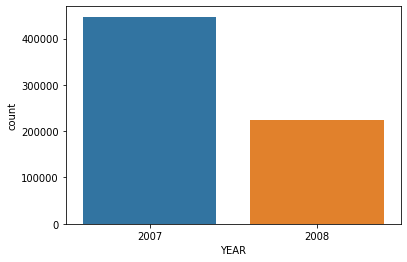

In [16]:
# Check relationship and plot graphs
sns.countplot(x="YEAR", data=data);
#because of 2008 data is end in month 7th so I'll count on this graph
# Just count number of transactions in each year

[Text(0, 0.5, '(Spend Rate in USD)')]

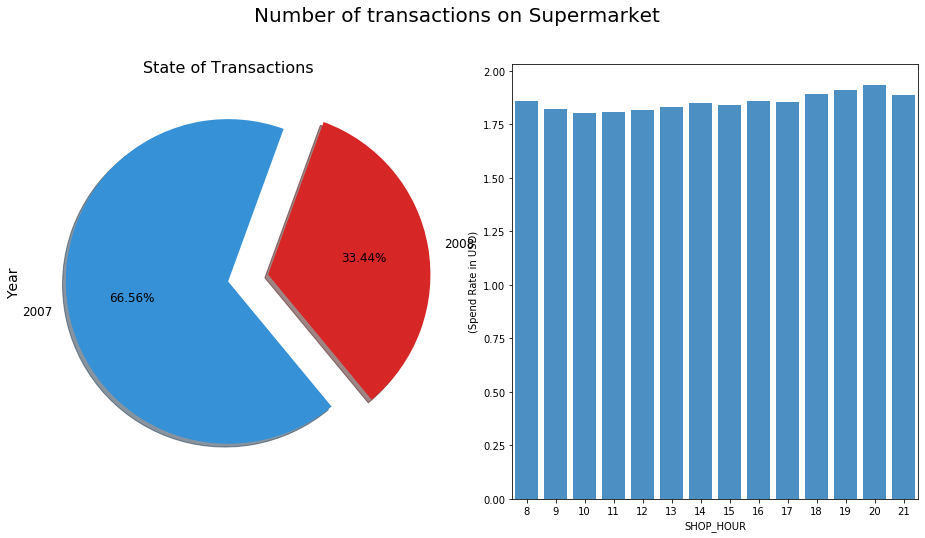

In [17]:
# Try to plot another type of graph to see the different
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]


plt.suptitle('Number of transactions on Supermarket', fontsize=20)

data["YEAR"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                              fontsize=12, startangle=70)


ax[0].set_title('State of Transactions', fontsize=16)
ax[0].set_ylabel('Year', fontsize=14)


palette = ["#3791D7"]
sns.barplot(x="SHOP_HOUR", y="SPEND", data=data, palette=palette, estimator=lambda x: sum(x)/len(x), ci = None)
ax[1].set(ylabel="(Spend Rate in USD)")

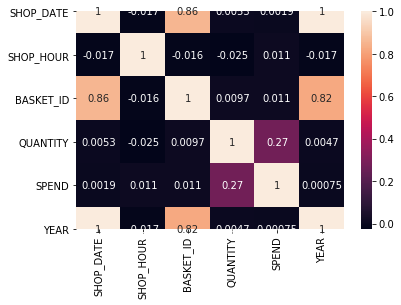

In [18]:
#Check some correlation between each table (can check only int type)
#from this heatmap and data, That can't see the correlation to benefits the problem.
sns.heatmap(data.corr(), annot=True)

In [19]:
data.head()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,YEAR
0,20071006,21,994107800268406,CUST0000153531,STORE00001,PRD0901391,1,0.37,2007
1,20070201,15,994104300305853,CUST0000219191,STORE00002,PRD0901915,1,5.08,2007
2,20071103,13,994108200514137,CUST0000526979,STORE00003,PRD0903379,1,2.36,2007
3,20070206,18,994104400743650,CUST0000913709,STORE00004,PRD0903305,1,0.20,2007
4,20071015,19,994108000780959,CUST0000961285,STORE00001,PRD0903387,1,1.65,2007


In [20]:
# describe the data in statistic to observe the information
data.describe()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,QUANTITY,SPEND,YEAR
count,6.719140e+05,671914.000000,6.719140e+05,671914.000000,671914.000000,671914.000000
mean,2.007391e+07,14.745869,9.941078e+14,1.514344,1.852796,2007.334440
std,4.594496e+03,3.551738,2.286042e+09,1.668037,2.589564,0.471795
min,2.007010e+07,8.000000,9.941039e+14,1.000000,0.010000,2007.000000
25%,2.007052e+07,12.000000,9.941058e+14,1.000000,0.750000,2007.000000
50%,2.007093e+07,15.000000,9.941077e+14,1.000000,1.210000,2007.000000
75%,2.008022e+07,17.000000,9.941098e+14,1.000000,2.040000,2008.000000
max,2.008071e+07,21.000000,9.941117e+14,73.000000,189.630000,2008.000000


In [21]:
# provide the code to see deeply in each month from SHOP_DATE
# create MONTH column from SHOP_DATE
MONTH = data['SHOP_DATE'] // 100

In [22]:
# create new column from the MONTH
MONTH_Y = MONTH /100
data['MONTH_Y'] = MONTH_Y

In [23]:
# check the MONTH_Y data and count the number of time in each month
MONTH_Y.value_counts()

2007.07    39127
2007.03    38751
2008.05    38668
2007.05    38335
2007.06    38242
2008.06    37860
2007.08    37818
2007.09    37669
2007.01    37311
2007.10    36913
2007.04    36825
2007.11    36011
2008.03    36005
2008.04    35978
2007.12    35913
2008.01    35121
2007.02    34284
2008.02    33983
2008.07     7100
Name: SHOP_DATE, dtype: int64

In [24]:
data.head()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,YEAR,MONTH_Y
0,20071006,21,994107800268406,CUST0000153531,STORE00001,PRD0901391,1,0.37,2007,2007.10
1,20070201,15,994104300305853,CUST0000219191,STORE00002,PRD0901915,1,5.08,2007,2007.02
2,20071103,13,994108200514137,CUST0000526979,STORE00003,PRD0903379,1,2.36,2007,2007.11
3,20070206,18,994104400743650,CUST0000913709,STORE00004,PRD0903305,1,0.20,2007,2007.02
4,20071015,19,994108000780959,CUST0000961285,STORE00001,PRD0903387,1,1.65,2007,2007.10


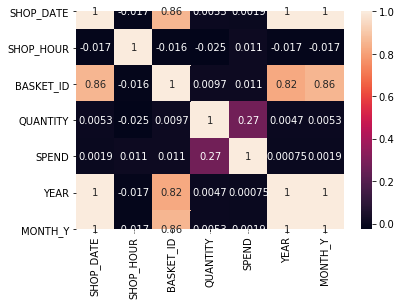

In [25]:
sns.heatmap(data.corr(), annot=True)
# so we see the correlation between MONTH_Y or SHOP_DATE and BASKET_ID
# still not benefit to problem

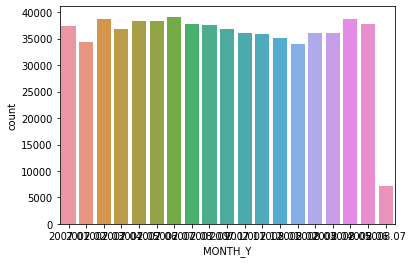

In [26]:
sns.countplot(x="MONTH_Y", data=data);
# according to this graph number of purchase mostly the same
# compare from each month between 2007 and 2008 you can see that the number is decreasing (from data below)

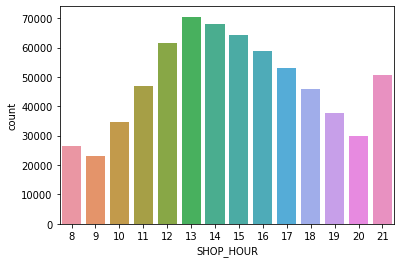

In [27]:
sns.countplot(x="SHOP_HOUR", data=data);
# you can see the graph of increasing and decreasing of purchase in several time
# peak at time 13.00-13.59

In [28]:
# write a function to check the amount of spend in each year 
# (can't compare because data in Year 2008 isn't complete)
# need to compare in each month
aggregation_functions = {'SPEND': 'sum'}
SPEND_Y = data.groupby(data['YEAR']).aggregate(aggregation_functions)

In [29]:
SPEND_Y.head()

,SPEND
YEAR,
2007,827950.14
2008,416969.23


In [30]:
# write a function to compare year 2007,2008 month by month
aggregation_functions = {'SPEND': 'sum'}
SPEND_M = data.groupby(data['MONTH_Y']).aggregate(aggregation_functions)
#data['SPEND_M'] = SPEND_M

In [31]:
SPEND_M.head(50)
# income amount (USD)

,SPEND
MONTH_Y,
2007.01,65310.76
2007.02,60890.61
2007.03,70586.21
2007.04,67388.26
2007.05,69085.60
2007.06,71792.28
2007.07,73254.93
2007.08,70229.05
2007.09,69175.50


In [32]:
data.head()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,YEAR,MONTH_Y
0,20071006,21,994107800268406,CUST0000153531,STORE00001,PRD0901391,1,0.37,2007,2007.10
1,20070201,15,994104300305853,CUST0000219191,STORE00002,PRD0901915,1,5.08,2007,2007.02
2,20071103,13,994108200514137,CUST0000526979,STORE00003,PRD0903379,1,2.36,2007,2007.11
3,20070206,18,994104400743650,CUST0000913709,STORE00004,PRD0903305,1,0.20,2007,2007.02
4,20071015,19,994108000780959,CUST0000961285,STORE00001,PRD0903387,1,1.65,2007,2007.10


In [33]:
aggregation_functions = {'SPEND': 'sum'}
SPEND_PRODUCT = data.groupby(data['PROD_CODE']).aggregate(aggregation_functions)
#SPEND_PRODUCT = data['PROD_CODE'].sort_values(['PROD_CODE'], ascending=[True]) 

In [34]:
#check data type of SPEND_PRODUCT
SPEND_PRODUCT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4978 entries, PRD0900001 to PRD0904997
Data columns (total 1 columns):
SPEND    4978 non-null float64
dtypes: float64(1)
memory usage: 77.8+ KB


In [35]:
# see the information of SPEND_PRODUCT in statistic
# observe the max and min spend
SPEND_PRODUCT.describe()

,SPEND
count,4978.000000
mean,250.084245
std,626.921786
min,0.060000
25%,49.462500
50%,107.955000
75%,247.487500
max,24236.520000


In [36]:
# Arrange the product that's most purchased all the time
SPEND_PRODUCT_TOP = SPEND_PRODUCT.sort_values(['SPEND'], ascending=[False])
SPEND_PRODUCT_TOP.head(10)

,SPEND
PROD_CODE,
PRD0904358,24236.52
PRD0900121,12603.78
PRD0903052,11457.75
PRD0901265,10546.05
PRD0904250,7445.10
PRD0901915,7223.76
PRD0903269,6582.94
PRD0900173,5158.45
PRD0901348,5057.30


In [37]:
# Arrange the most spend rows that's purchased in each transactions
SPEND_TOP_EACH = data.sort_values(['SPEND'], ascending=[False])
SPEND_TOP_EACH.head(10)

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,YEAR,MONTH_Y
614497,20071014,13,994107900411542,CUST0000379336,STORE00002,PRD0901683,9,189.63,2007,2007.10
635729,20071116,16,994108400244983,CUST0000125061,STORE00003,PRD0900499,9,183.42,2007,2007.11
238937,20071107,18,994108300276816,CUST0000173993,STORE00001,PRD0900499,8,163.04,2007,2007.11
333440,20080621,18,994111500280638,CUST0000173993,STORE00001,PRD0900499,8,163.04,2008,2008.06
588782,20070307,17,994104800750980,CUST0000918353,STORE00002,PRD0904735,16,147.84,2007,2007.03
106469,20070226,16,994104700759461,CUST0000918353,STORE00002,PRD0904735,16,147.84,2007,2007.02
264261,20080703,16,994111700579359,CUST0000633237,STORE00001,PRD0902939,35,134.05,2008,2008.07
545580,20070923,14,994107600666463,CUST0000795691,STORE00003,PRD0903493,17,127.33,2007,2007.09
187589,20071113,20,994108400318848,CUST0000237141,STORE00002,PRD0900499,6,122.28,2007,2007.11
597024,20070621,13,994106300344076,CUST0000268918,STORE00002,PRD0901923,11,101.97,2007,2007.06


# try to observe each top Product in detail
# arrange top 4 product below

# FIRST PRODUCT

In [38]:
# observe most spend of 'PRD0904358' all the time
PRD0904358 = SPEND_TOP_EACH.loc[SPEND_TOP_EACH['PROD_CODE'] == 'PRD0904358']
PRD0904358.head(10)

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,YEAR,MONTH_Y
99628,20071229,8,994109000182996,CUST0000123240,STORE00002,PRD0904358,36,55.44,2007,2007.12
331149,20070518,16,994105800247265,CUST0000123240,STORE00002,PRD0904358,33,50.82,2007,2007.05
228073,20070401,10,994105100246002,CUST0000123240,STORE00002,PRD0904358,19,29.26,2007,2007.04
494952,20080605,10,994111300248661,CUST0000123240,STORE00002,PRD0904358,19,29.26,2008,2008.06
244983,20080116,8,994109300233117,CUST0000123240,STORE00002,PRD0904358,17,26.18,2008,2008.01
547150,20071001,12,994107800499547,CUST0000510059,STORE00003,PRD0904358,16,24.64,2007,2007.10
228139,20070226,21,994104700239176,CUST0000123240,STORE00002,PRD0904358,15,23.10,2007,2007.02
598552,20070709,8,994106600255682,CUST0000123240,STORE00002,PRD0904358,14,21.56,2007,2007.07
87749,20070202,20,994104300561381,CUST0000622502,STORE00001,PRD0904358,9,13.86,2007,2007.02
650576,20080126,19,994109400403478,CUST0000390986,STORE00002,PRD0904358,9,13.86,2008,2008.01


In [39]:
# to compare the most spend of product 'PRD0904358' and frequency purchased of this product
SPEND_FREQ = data.sort_values(['MONTH_Y'], ascending=[False])
PRD0904358_FREQ = SPEND_FREQ.loc[SPEND_FREQ['PROD_CODE'] == 'PRD0904358']
PRD0904358_FREQ.head()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,YEAR,MONTH_Y
366154,20080706,17,994111700268618,CUST0000153639,STORE00003,PRD0904358,1,1.54,2008,2008.07
85315,20080702,21,994111700537068,CUST0000568678,STORE00001,PRD0904358,1,1.54,2008,2008.07
474391,20080704,12,994111700409153,CUST0000370105,STORE00004,PRD0904358,1,1.54,2008,2008.07
21983,20080701,16,994111700171072,CUST0000004594,STORE00003,PRD0904358,1,1.54,2008,2008.07
21978,20080703,11,994111700194701,CUST0000040677,STORE00002,PRD0904358,3,4.62,2008,2008.07


In [40]:
# observe information in statistic
PRD0904358.describe()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,QUANTITY,SPEND,YEAR,MONTH_Y
count,1.214700e+04,12147.000000,1.214700e+04,12147.000000,12147.000000,12147.000000,12147.000000
mean,2.007392e+07,14.697950,9.941078e+14,1.295629,1.995268,2007.334733,2007.390864
std,4.587366e+03,3.743118,2.254214e+09,0.988798,1.522748,0.471916,0.458750
min,2.007010e+07,8.000000,9.941039e+14,1.000000,1.540000,2007.000000,2007.010000
25%,2.007052e+07,12.000000,9.941059e+14,1.000000,1.540000,2007.000000,2007.050000
50%,2.007100e+07,15.000000,9.941078e+14,1.000000,1.540000,2007.000000,2007.100000
75%,2.008022e+07,18.000000,9.941098e+14,1.000000,1.540000,2008.000000,2008.020000
max,2.008071e+07,21.000000,9.941117e+14,36.000000,55.440000,2008.000000,2008.070000


In [41]:
# observe the count of purchase this product by time 
PRD0904358['SHOP_HOUR'].value_counts()

13    1178
15    1086
14    1081
12    1071
21    1037
16     987
17     911
18     852
11     850
10     677
8      663
19     659
20     614
9      481
Name: SHOP_HOUR, dtype: int64

# SECOND PRODUCT

In [42]:
# observe most spend of 'PRD0900121' all the time
PRD0900121 = SPEND_TOP_EACH.loc[SPEND_TOP_EACH['PROD_CODE'] == 'PRD0900121']
PRD0900121.head(10)

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,YEAR,MONTH_Y
171083,20070503,10,994105600728720,CUST0000853230,STORE00002,PRD0900121,11,10.78,2007,2007.05
506646,20080114,8,994109300762215,CUST0000978405,STORE00001,PRD0900121,9,8.82,2008,2008.01
366038,20070227,13,994104700451768,CUST0000449531,STORE00004,PRD0900121,9,8.82,2007,2007.02
426260,20070105,17,994103900306773,CUST0000297515,STORE00001,PRD0900121,9,8.82,2007,2007.01
624619,20070513,19,994105700453937,CUST0000449531,STORE00004,PRD0900121,8,7.84,2007,2007.05
486389,20070827,12,994107300570592,CUST0000610529,STORE00003,PRD0900121,8,7.84,2007,2007.08
73459,20070222,18,994104600446372,CUST0000449531,STORE00004,PRD0900121,8,7.84,2007,2007.02
351590,20080412,21,994110500721920,CUST0000853230,STORE00002,PRD0900121,7,6.86,2008,2008.04
136661,20080219,21,994109800726004,CUST0000853230,STORE00002,PRD0900121,7,6.86,2008,2008.02
21996,20080501,17,994110800396544,CUST0000352303,STORE00004,PRD0900121,7,6.86,2008,2008.05


In [43]:
# to compare the most spend of product 'PRD0900121' and frequency purchased of this product
PRD0900121_FREQ = SPEND_FREQ.loc[SPEND_FREQ['PROD_CODE'] == 'PRD0900121']
PRD0900121_FREQ.head()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,YEAR,MONTH_Y
85336,20080701,16,994111700493872,CUST0000501799,STORE00003,PRD0900121,1,0.98,2008,2008.07
645002,20080705,13,994111700730135,CUST0000864629,STORE00002,PRD0900121,3,2.94,2008,2008.07
578035,20080702,14,994111700586989,CUST0000644893,STORE00001,PRD0900121,1,0.98,2008,2008.07
310476,20080704,11,994111700532325,CUST0000561205,STORE00002,PRD0900121,1,0.98,2008,2008.07
534870,20080703,19,994111700569594,CUST0000618516,STORE00002,PRD0900121,1,0.98,2008,2008.07


In [44]:
# observe information in statistic
PRD0900121.describe()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,QUANTITY,SPEND,YEAR,MONTH_Y
count,8.747000e+03,8747.000000,8.747000e+03,8747.000000,8747.000000,8747.000000,8747.000000
mean,2.007394e+07,14.260203,9.941078e+14,1.470333,1.440926,2007.336458,2007.392001
std,4.594241e+03,3.524469,2.260462e+09,1.068811,1.047435,0.472525,0.459433
min,2.007010e+07,8.000000,9.941039e+14,1.000000,0.980000,2007.000000,2007.010000
25%,2.007052e+07,12.000000,9.941059e+14,1.000000,0.980000,2007.000000,2007.050000
50%,2.007093e+07,14.000000,9.941077e+14,1.000000,0.980000,2007.000000,2007.090000
75%,2.008022e+07,17.000000,9.941097e+14,1.000000,0.980000,2008.000000,2008.020000
max,2.008071e+07,21.000000,9.941117e+14,11.000000,10.780000,2008.000000,2008.070000


In [45]:
PRD0900121['SHOP_HOUR'].value_counts()

13    992
12    867
14    866
15    801
11    735
16    714
17    645
10    528
18    525
21    490
19    455
8     437
9     380
20    312
Name: SHOP_HOUR, dtype: int64

# THIRD PRODUCT

In [46]:
# observe most spend of 'PRD0903052' all the time
PRD0903052 = SPEND_TOP_EACH.loc[SPEND_TOP_EACH['PROD_CODE'] == 'PRD0903052']
PRD0903052.head(10)

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,YEAR,MONTH_Y
252800,20070615,18,994106200408756,CUST0000361701,STORE00001,PRD0903052,1,3.72,2007,2007.06
488865,20080403,13,994110400277684,CUST0000213447,STORE00003,PRD0903052,1,3.70,2008,2008.04
506185,20080330,16,994110300299656,CUST0000213447,STORE00003,PRD0903052,1,3.52,2008,2008.03
611838,20070521,21,994105900316709,CUST0000219191,STORE00002,PRD0903052,1,3.45,2007,2007.05
84807,20070721,17,994106700480665,CUST0000470040,STORE00001,PRD0903052,1,3.08,2007,2007.07
502884,20070807,16,994107000410387,CUST0000361701,STORE00001,PRD0903052,1,3.06,2007,2007.08
120985,20071123,14,994108500307388,CUST0000219191,STORE00002,PRD0903052,1,3.02,2007,2007.11
189752,20070719,20,994106700317134,CUST0000219191,STORE00002,PRD0903052,1,2.99,2007,2007.07
292823,20080303,13,994110000315904,CUST0000219191,STORE00002,PRD0903052,1,2.95,2008,2008.03
87363,20070731,12,994106900322011,CUST0000219191,STORE00002,PRD0903052,1,2.95,2007,2007.07


In [47]:
# to compare the most spend of product 'PRD0903052' and frequency purchased of this product
PRD0903052_FREQ = SPEND_FREQ.loc[SPEND_FREQ['PROD_CODE'] == 'PRD0903052']
PRD0903052_FREQ.head()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,YEAR,MONTH_Y
644587,20080704,18,994111700296258,CUST0000196193,STORE00003,PRD0903052,1,0.38,2008,2008.07
405016,20080706,16,994111700735581,CUST0000872831,STORE00003,PRD0903052,1,0.94,2008,2008.07
84917,20080705,21,994111700304795,CUST0000209220,STORE00003,PRD0903052,1,1.19,2008,2008.07
175874,20080703,21,994111700222415,CUST0000082996,STORE00001,PRD0903052,1,0.71,2008,2008.07
84933,20080704,11,994111700617199,CUST0000691571,STORE00003,PRD0903052,1,0.50,2008,2008.07


In [48]:
# observe information in statistic
PRD0903052.describe()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,QUANTITY,SPEND,YEAR,MONTH_Y
count,1.558700e+04,15587.000000,1.558700e+04,15587.0,15587.000000,15587.000000,15587.000000
mean,2.007395e+07,14.559825,9.941078e+14,1.0,0.735084,2007.338872,2007.393758
std,4.609699e+03,3.546188,2.289307e+09,0.0,0.347553,0.473342,0.460980
min,2.007010e+07,8.000000,9.941039e+14,1.0,0.010000,2007.000000,2007.010000
25%,2.007052e+07,12.000000,9.941058e+14,1.0,0.500000,2007.000000,2007.050000
50%,2.007093e+07,14.000000,9.941077e+14,1.0,0.700000,2007.000000,2007.090000
75%,2.008022e+07,17.000000,9.941098e+14,1.0,0.890000,2008.000000,2008.020000
max,2.008071e+07,21.000000,9.941117e+14,1.0,3.720000,2008.000000,2008.070000


In [49]:
PRD0903052['SHOP_HOUR'].value_counts()

13    1670
14    1538
12    1481
15    1455
16    1318
17    1200
11    1178
18    1097
21    1030
10     873
19     830
8      664
20     654
9      599
Name: SHOP_HOUR, dtype: int64

# FOURTH PRODUCT

In [50]:
# observe most spend of 'PRD0901265' all the time
PRD0901265 = SPEND_TOP_EACH.loc[SPEND_TOP_EACH['PROD_CODE'] == 'PRD0901265']
PRD0901265.head(10)

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,YEAR,MONTH_Y
451376,20070310,11,994104800775258,CUST0000956351,STORE00002,PRD0901265,1,15.81,2007,2007.03
391244,20071006,16,994107800260261,CUST0000140715,STORE00003,PRD0901265,1,14.45,2007,2007.10
115724,20070808,21,994107000793352,CUST0000956351,STORE00002,PRD0901265,1,11.50,2007,2007.08
580701,20070815,17,994107100790377,CUST0000956351,STORE00002,PRD0901265,1,11.13,2007,2007.08
555548,20070102,19,994103900673345,CUST0000956351,STORE00002,PRD0901265,1,10.97,2007,2007.01
253066,20080508,21,994110900789959,CUST0000956351,STORE00002,PRD0901265,1,10.47,2008,2008.05
615256,20071119,21,994108500794086,CUST0000956351,STORE00002,PRD0901265,1,10.47,2007,2007.11
399827,20070119,14,994104100243416,CUST0000140715,STORE00003,PRD0901265,1,10.46,2007,2007.01
468528,20070117,19,994104100749165,CUST0000956351,STORE00002,PRD0901265,1,10.08,2007,2007.01
219163,20070610,19,994106100262962,CUST0000140715,STORE00003,PRD0901265,1,9.50,2007,2007.06


In [51]:
# to compare the most spend of product 'PRD0901265' and frequency purchased of this product
PRD0901265_FREQ = SPEND_FREQ.loc[SPEND_FREQ['PROD_CODE'] == 'PRD0901265']
PRD0901265_FREQ.head()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,YEAR,MONTH_Y
84877,20080706,10,994111700436477,CUST0000412413,STORE00001,PRD0901265,1,2.51,2008,2008.07
84949,20080704,12,994111700229940,CUST0000094339,STORE00001,PRD0901265,1,1.38,2008,2008.07
353217,20080705,15,994111700791794,CUST0000958517,STORE00004,PRD0901265,1,1.65,2008,2008.07
473811,20080706,16,994111700302951,CUST0000206355,STORE00002,PRD0901265,1,1.12,2008,2008.07
646556,20080706,13,994111700373613,CUST0000315769,STORE00003,PRD0901265,1,1.95,2008,2008.07


In [52]:
# observe information in statistic
PRD0901265.describe()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,QUANTITY,SPEND,YEAR,MONTH_Y
count,6.225000e+03,6225.000000,6.225000e+03,6225.0,6225.000000,6225.000000,6225.000000
mean,2.007428e+07,14.766747,9.941077e+14,1.0,1.694145,2007.377831,2007.426198
std,4.744346e+03,3.546635,2.409582e+09,0.0,0.920070,0.484884,0.474454
min,2.007010e+07,8.000000,9.941039e+14,1.0,0.010000,2007.000000,2007.010000
25%,2.007042e+07,12.000000,9.941053e+14,1.0,1.280000,2007.000000,2007.040000
50%,2.007093e+07,15.000000,9.941077e+14,1.0,1.550000,2007.000000,2007.090000
75%,2.008022e+07,17.000000,9.941098e+14,1.0,1.870000,2008.000000,2008.020000
max,2.008071e+07,21.000000,9.941117e+14,1.0,15.810000,2008.000000,2008.070000


In [53]:
PRD0901265['SHOP_HOUR'].value_counts()

13    666
15    599
14    586
12    576
16    564
17    491
21    488
11    460
18    423
19    335
10    330
20    279
8     226
9     202
Name: SHOP_HOUR, dtype: int64

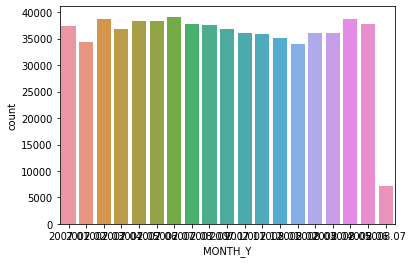

In [54]:
# see each spend in each month to compare the dataframe before
sns.countplot(x="MONTH_Y", data=SPEND_TOP_EACH);

In [55]:
# check null values of the data again  (For missing double check)
data.replace([np.inf, -np.inf], np.nan)
data.isnull().any()

SHOP_DATE     False
SHOP_HOUR     False
BASKET_ID     False
CUST_CODE     False
STORE_CODE    False
PROD_CODE     False
QUANTITY      False
SPEND         False
YEAR          False
MONTH_Y       False
dtype: bool

# FINISH
# DONE :D